In [3]:
from glob import glob
import datetime

from astropy.table import Table
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
from scipy.stats import spearmanr

# HR v Age - with Redshift cuts

Since we can't figure out what is happening, does it change with redshift?

In [27]:
dataset = 'campbell'   # campbell' or 'campbellG'
z_max = 0.2   # campbell is already cut at  ~0.33

## Import SALT Parameters

I can only do this for Campbell's data. Data contains:
('CID','Z','Z_ERR','SN_RA','SN_DEC','GAL_RA','GAL_DEC','HOST_OBJID','X0','X0_ERR',**'X1','X1_ERR','COLOR','COLOR_ERR'**, 'C01','C00','C11','C22','C02','C12','MU','MU_MB','MU_ERR')

In [11]:
# SNData = pd.read_csv('../data/CampbellHoltzman_mb.tsv', sep='\t', usecols=['SNID', 'redshift', 'hr', 'err_mu'], index_col='SNID')
t = Table.read('../data/SDSS_Photometric_SNe_Ia.fits')
SNData = t['CID','Z','X1','X1_ERR','COLOR','COLOR_ERR'].to_pandas()
SNData.columns = SNData.columns.str.lower()
SNData.rename(columns={'cid': 'SNID', 'z': 'redshift'}, inplace=True)
SNData.set_index('SNID', inplace=True)
print(len(SNData))
SNData.head(5)

752


,redshift,x1,x1_err,color,color_err
SNID,,,,,
10028,0.065392,-1.167410,0.265755,0.009724,0.034279
10037,0.253816,-0.986516,0.780117,0.057378,0.088287
1032,0.129755,-2.476700,0.236314,0.111854,0.042552
10324,0.251725,-1.685120,0.741949,-0.064591,0.067772
10434,0.104161,0.206981,0.331018,-0.088817,0.032082


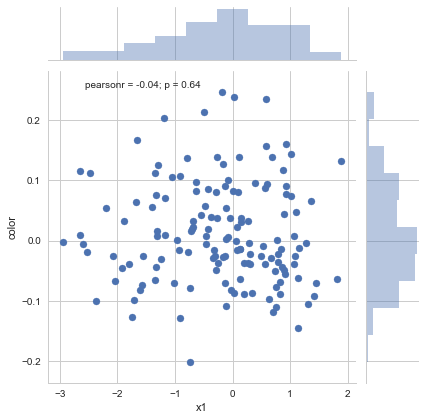

In [51]:
# sns.jointplot(SNData['x1'], SNData['color'], marginal_kws={'bins':20})
sns.jointplot(SNData['x1'], SNData['color'])
plt.show()

## Cut on Redshift

In [12]:
SNData = SNData[SNData['redshift']<z_max]
len(SNData)
# should be 110, will be fixed later

143

## Import Ages

In [28]:
# number of samples desired
num = 50

In [29]:
# test= pd.concat([SNData, ages], axis=1)  ## ages dataframe is going away
test = SNData.copy()
test.dropna(inplace=True)  # drop rows that don't hae both HR & ages
for i in range(num):
    test['random age {}'.format(i)] = np.nan
# test.head(5)
test

,redshift,x1,x1_err,color,color_err,random age 0,random age 1,random age 2,random age 3,random age 4,...,random age 40,random age 41,random age 42,random age 43,random age 44,random age 45,random age 46,random age 47,random age 48,random age 49
SNID,,,,,,,,,,,,,,,,,,,,,
10028,0.065392,-1.167410,0.265755,0.009724,0.034279,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032,0.129755,-2.476700,0.236314,0.111854,0.042552,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10434,0.104161,0.206981,0.331018,-0.088817,0.032082,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10805,0.045248,-0.370266,0.633248,0.039448,0.034081,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11120,0.107264,0.077876,0.587360,-0.015269,0.033427,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11172,0.136329,-1.332040,0.397050,0.075910,0.047857,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1241,0.089790,-0.551730,0.091923,0.042973,0.026966,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12860,0.121679,-0.263564,0.203874,0.138260,0.029417,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12898,0.083581,-0.036655,0.096328,0.037339,0.025791,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**NOTICE:**

**THIS WILL TAKES A VERY LONG TIME**


In [30]:
if dataset == 'gupta':
    files = '../resources/SN{}_gupta_chain.tsv'
if dataset == 'campbell':
    files = '../resources/SN{}_campbell_chain.tsv'
if dataset == 'campbellG':
    files = '../resources/SN{}_campbellG_chain.tsv'

# for i in SNData.index.values:
for i in test.index.values:
    # So this works with only a partical dataset
    try:
        ages_ = pd.read_csv(files.format(i), sep='\t', skiprows=[1],
                            usecols=['age'], dtype={'age': np.float64})
        # Get 10 random values of ages_
        # Use randint because it is half open: [low, high)
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
        # Unlike random_integer
        index=np.random.randint(len(ages_), size=num)
        # add the randomly collected ages to the dataframe.
        # `.loc` allows access to the `num` random age "cells"
        # `.values` takes the ages_ from a series to a array
        # `.reshape` takes the (`num`,1) column array and makes it a horizontal array
        test.loc[i, 'random age 0':'random age {}'.format(num-1)] = ages_.values[index].reshape(num)
    except FileNotFoundError:
        # if data file is not there do nothing
        print(f'Skipping SN{i} becuase {files.format(i)} is not present')

# remove rows where no age was added
# should be a result of hitting the except block.
test.dropna(inplace=True)        

print(len(test))   #should be 110
test.head(5)

Skipping SN10434 becuase ../resources/SN10434_campbell_chain.tsv is not present
Skipping SN11120 becuase ../resources/SN11120_campbell_chain.tsv is not present
Skipping SN1241 becuase ../resources/SN1241_campbell_chain.tsv is not present
Skipping SN13044 becuase ../resources/SN13044_campbell_chain.tsv is not present
Skipping SN13796 becuase ../resources/SN13796_campbell_chain.tsv is not present
Skipping SN13907 becuase ../resources/SN13907_campbell_chain.tsv is not present
Skipping SN14024 becuase ../resources/SN14024_campbell_chain.tsv is not present
Skipping SN15132 becuase ../resources/SN15132_campbell_chain.tsv is not present
Skipping SN15222 becuase ../resources/SN15222_campbell_chain.tsv is not present
Skipping SN1545 becuase ../resources/SN1545_campbell_chain.tsv is not present
Skipping SN15508 becuase ../resources/SN15508_campbell_chain.tsv is not present
Skipping SN15897 becuase ../resources/SN15897_campbell_chain.tsv is not present
Skipping SN16259 becuase ../resources/SN1625

,redshift,x1,x1_err,color,color_err,random age 0,random age 1,random age 2,random age 3,random age 4,...,random age 40,random age 41,random age 42,random age 43,random age 44,random age 45,random age 46,random age 47,random age 48,random age 49
SNID,,,,,,,,,,,,,,,,,,,,,
10028,0.065392,-1.167410,0.265755,0.009724,0.034279,7.085429,7.426865,6.094794,6.069753,6.270269,...,7.115463,6.096586,7.063140,7.661288,5.173559,5.953468,7.395893,6.639353,5.128086,7.064324
1032,0.129755,-2.476700,0.236314,0.111854,0.042552,7.038688,5.653211,3.382333,7.220878,6.939443,...,0.912448,6.060737,8.495223,1.585724,4.870809,6.754752,6.667083,5.080655,7.718235,5.522693
10805,0.045248,-0.370266,0.633248,0.039448,0.034081,5.875297,3.187007,5.823399,5.496895,2.850817,...,2.839308,6.772448,4.404885,1.287699,4.932882,1.881260,6.299198,2.194612,6.337634,2.037329
11172,0.136329,-1.332040,0.397050,0.075910,0.047857,5.871433,5.193016,4.850127,4.724577,5.120215,...,5.176259,4.927242,5.274362,4.371263,4.091852,4.902167,5.465691,6.744626,5.684148,5.704687
12860,0.121679,-0.263564,0.203874,0.138260,0.029417,0.782462,2.091344,7.000822,6.298893,0.960070,...,2.019807,6.454036,1.378706,7.002684,6.007872,7.085688,6.220833,5.696478,2.540717,2.932647


In [31]:
# make sure you add the dtype, or else the regression plots do not work
plot_x1 = pd.DataFrame(columns=['x1', 'age'], dtype=np.float64)
plot_x1.loc[0] = 1

for index in range(len(test)):
    for num_ in range(num):
# test.loc[index+1, 'random age {}'.format(num_)]
        # add a small bit of noice on the HR to let the linear fitting work.
        # this remvoes the fact that so many have the SAME HR.
        plot_x1.loc[index*num+num_, ['x1', 'age']] = [test.iloc[index]['x1']+(test.iloc[index]['x1_err']/3)*np.random.randn(1)[0],
                                                   test.iloc[index]['random age {}'.format(num_)]]
#         print(plot[index*num_+num_, ['hr', 'age']])
#         plot.loc[index_*num_+num_, ['hr', 'age']] = test[index, 'random age {}'.format(num_)]

plot_x1.head(5)

,x1,age
0,-1.199119,7.085429
1,-1.168416,7.426865
2,-1.144546,6.094794
3,-1.391110,6.069753
4,-1.264043,6.270269


In [32]:
# make sure you add the dtype, or else the regression plots do not work
plot_color = pd.DataFrame(columns=['color', 'age'], dtype=np.float64)
plot_color.loc[0] = 1

for index in range(len(test)):
    for num_ in range(num):
# test.loc[index+1, 'random age {}'.format(num_)]
        # add a small bit of noice on the HR to let the linear fitting work.
        # this remvoes the fact that so many have the SAME HR.
        plot_color.loc[index*num+num_, ['color', 'age']] = [test.iloc[index]['color']+(test.iloc[index]['color_err']/3)*np.random.randn(1)[0],
                                                   test.iloc[index]['random age {}'.format(num_)]]
#         print(plot[index*num_+num_, ['hr', 'age']])
#         plot.loc[index_*num_+num_, ['hr', 'age']] = test[index, 'random age {}'.format(num_)]

plot_color.head(5)

,color,age
0,0.004315,7.085429
1,0.012936,7.426865
2,0.020222,6.094794
3,-0.006892,6.069753
4,0.011132,6.270269


## Make plot

In [35]:
# Set plot configurations

## ylim changes
if dataset == 'gupta':
    ylim = (-0.5, 0.5)
else:
    ylim = (-0.75, 0.75)

## global v local labels
if dataset in ['gupta', 'campbellG']:
    xlabel = 'global age [Gyr]'
else:
    xlabel = 'local age [Gyr]'
    
    
## Savefig
uuid = 0   #need a place holder
if dataset == 'gupta':
    savename = f'GlobalHRvAge{uuid}.pdf'
elif dataset == 'campbellG':
    savename = f'campbellG-HRvAge{uuid}.pdf'
elif dataset == 'campbell':
    savename = f'LocalHRvAge{uuid}.pdf'
else:
    savename = f'HRvAge{uuid}.pdf'

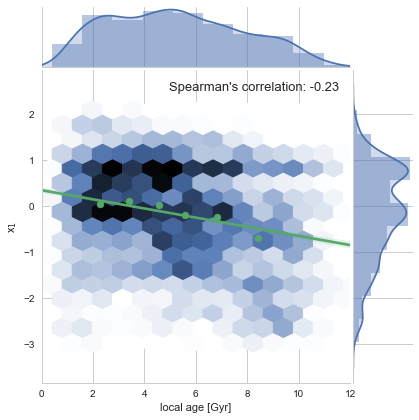

In [63]:
#'rug':True in marginal_kws, makes it very slow and looks like a solid line
g = sns.jointplot(plot_x1['age'], plot_x1['x1'], stat_func=spearmanr, kind="hex", gridsize=15,
                  bins=None, space=0.05, xlim=(0,12),  #ylim=ylim, #ylim=(-0.75, 1.4),
                  marginal_kws={'kde':True, 'hist':True, 'bins':10,
                                'kde_kws':{"shade":True}}
                 )

# g = g.plot_joint(plt.scatter, alpha=0) #skip green color
g = g.plot_joint(sns.regplot, x_bins=6, x_ci=None)#,  # not really needed anymore
#                  ci=68)

# This is plotted on top of jointplot's forced marginals
# g = g.plot_marginals(sns.distplot, kde=True)  # currently the best option
# g = g.plot_marginals(sns.distplot, kde=True, hist=False, kde_kws={"shade" : True})
# g = g.plot_marginals(sns.kdeplot, shade=True, cumulative=True, hist=False)

g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="upper right", fontsize=13, 
               template="{stat}: {val:.2f}")
# it looks like <abs(0.3) for spearman r is not very correlated.

g = g.set_axis_labels(xlabel, 'x$_1$')
# fig.set_tight_layout({'pad': 1.5})   #cut edge whitespace -- not needed for this figure.

uuid = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
# g.savefig(savename)
# g.savefig('X1vAge-campbell-local-z02.pdf')
plt.show()

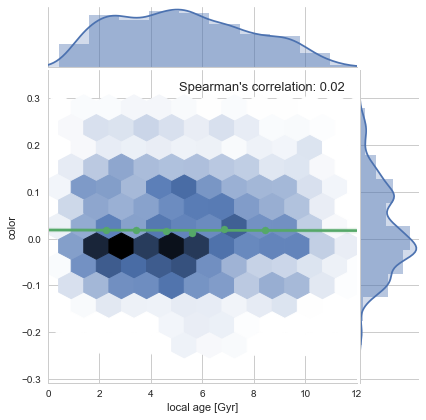

In [59]:
#'rug':True in marginal_kws, makes it very slow and looks like a solid line
g = sns.jointplot(plot_color['age'], plot_color['color'], stat_func=spearmanr, kind="hex", gridsize=12,
                  bins=None, space=0.05, xlim=(0,12),  #ylim=ylim, #ylim=(-0.75, 1.4),
                  marginal_kws={'kde':True, 'hist':True, 'bins':10,
                                'kde_kws':{"shade":True}}
                 )

# g = g.plot_joint(plt.scatter, alpha=0) #skip green color
g = g.plot_joint(sns.regplot, x_bins=6, x_ci=None)#,  # not really needed anymore
#                  ci=68)

# This is plotted on top of jointplot's forced marginals
# g = g.plot_marginals(sns.distplot, kde=True)  # currently the best option
# g = g.plot_marginals(sns.distplot, kde=True, hist=False, kde_kws={"shade" : True})
# g = g.plot_marginals(sns.kdeplot, shade=True, cumulative=True, hist=False)

g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="upper right", fontsize=13, 
               template="{stat}: {val:.2f}")
# it looks like <abs(0.3) for spearman r is not very correlated.

g = g.set_axis_labels(xlabel, 'color')
# fig.set_tight_layout({'pad': 1.5})   #cut edge whitespace -- not needed for this figure.

uuid = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
# g.savefig(savename)
# g.savefig('ColorvAge-campbell-local-z02.pdf')
plt.show()